In [1]:
import numpy as np
import astropy.units as u
from astropy.cosmology import Planck13 as cosmo
from astropy import constants as const

from scipy.interpolate import interp1d as i1d
from scipy.interpolate import interp2d as i2d
from scipy.special import legendre

import camb

import pickle

from scipy.integrate import quad
from scipy.integrate import fixed_quad
from scipy.integrate import romberg

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from scipy.fft import fft,ifft
import matplotlib.gridspec as gridspec
from scipy.stats import poisson

from classy import Class

from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

import powerbox as pbox

import PoweSpectrumLine
from PoweSpectrumLine import COpower

Here we create an instance of Class; we will use the power spectrum. 

In [7]:
# create instance of the class "Class"
LambdaCDM = Class()
# pass input parameters
m1=0.06/3
m2=0 #0.06/3
m3= 0 #0.06/3

LambdaCDM.set({'N_ncdm':3})
LambdaCDM.set({'m_ncdm':str(m1)+','+str(m2)+','+str(m3)})
LambdaCDM.set({'omega_b':0.022032,'omega_cdm':0.12038,'h':0.67556,'A_s':2.215e-9,'n_s':0.9619,'tau_reio':0.0925})
LambdaCDM.set({'output':'mPk','P_k_max_1/Mpc':100, 'z_max_pk':10.})
# run class
LambdaCDM.compute()

We define a dectionary for the CO mission we are looking at.

In [2]:
CO= {"tobs": 6000 * u.hour ,"z": (115.271/30)- 1  ,"beam" : 4*u.arcmin,"omega" : 2.25*u.deg**2, "nu" : 115.271 * u.GHz,"deltanu" : 8 *u.GHz, "nuObs" : 30 * u.GHz, "dnu" : 7.324 *u.MHz, "Ntot" : 19}


In [3]:
# create an instance of the class for computing Window Functions

PSline = COpower()
from PoweSpectrumLine import XLT

Here I take the mass and luminosity array from LIM to compare with. I then use my function LTonyLy to compute my L and compare. 

In [6]:
Mlim_ary = np.loadtxt('/Users/andreacaputo/Desktop/Phd/lim-master 4/MlimGrid.dat')
LCOlim_ary = np.loadtxt('/Users/andreacaputo/Desktop/Phd/lim-master 4/COLgrid.dat')


In [7]:
L_ary = np.array([PSline.LTonyLy([m]*u.Msun, CO["z"]).value for m in Mlim_ary])

# Good agreement with LIM for the luminosity function

Check the luminosity function for CO emission. 

[]

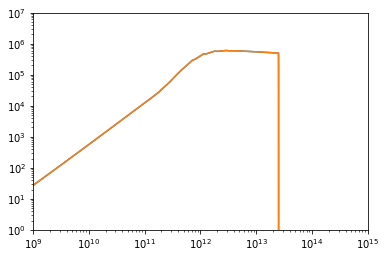

In [8]:
plt.plot(Mlim_ary, L_ary)
plt.plot(Mlim_ary, LCOlim_ary)

plt.axis([1e9,1e15, 1,1e7])

plt.loglog()

# Let's now check the multipoles 

In [8]:
def Pm(k,z):
    return LambdaCDM.pk(k.value, z)

mu_ary = np.linspace(-1,1)
k_ary = 10**np.arange(-2,0, 0.1)

We use the function "MultipoleNoWmission", that is to say, this function will give you back the monopole, quadropule and hexadecapole without applying any window function. You need to pass the value k at which you want to evaluate it, the array of $\mu$ to do the integral, the power spectrum and the dictionary for the mission you are considerind (CO in this case).

In [21]:
ary_multipoles = np.array([PSline.MultipoleNoWmission(k / u.Mpc , mu_ary, Pm(k/ u.Mpc, CO["z"]), CO) for k in k_ary])



In [ ]:
plt.plot(k_ary, 1e12 * ary_multipoles[:,0], label = 'monopole')
plt.plot(k_ary, 1e12 * ary_multipoles[:,1], label = 'quadrupole')
plt.plot(k_ary, 1e12 * ary_multipoles[:,2], label = 'hexadecapole')

plt.loglog()